In [1]:
from google.cloud import bigquery

# Conecta automáticamente a tu proyecto
client = bigquery.Client(project='datamanagementbi')

print(f"✓ Conectado al proyecto: {client.project}")

# Lista tus datasets
datasets = list(client.list_datasets())
if datasets:
    print(f"\n✓ Datasets disponibles ({len(datasets)}):")
    for dataset in datasets:
        print(f"  - {dataset.dataset_id}")
else:
    print("\n⚠ No se encontraron datasets en este proyecto")

/opt/miniconda3/lib/python3.13/site-packages/google/auth/_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


✓ Conectado al proyecto: datamanagementbi

✓ Datasets disponibles (3):
  - bronze_data
  - gold_data
  - silver_data


In [ ]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project='datamanagementbi')

#Traemos los datos y almacenamos en un df
tabla_completa = 'datamanagementbi.gold_data.modelo_final'
tabla = client.get_table(tabla_completa)

query = """
    SELECT *
    FROM `datamanagementbi.gold_data.modelo_final`
"""

df = client.query(query).to_dataframe()
print(df)



/opt/miniconda3/lib/python3.13/site-packages/google/auth/_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


📊 INFORMACIÓN DE LA TABLA: modelo_final
Total de filas: 1,080,097
Tamaño: 187.43 MB
Última modificación: 2025-10-22 11:44:40.674000+00:00

📋 COLUMNAS:
------------------------------------------------------------
  • fecha                          | DATE
  • id_geografia                   | STRING
  • id_tramo_horario               | INTEGER
  • id_sector_economico            | INTEGER
  • consumo_kwh                    | FLOAT
  • anio                           | INTEGER
  • mes                            | INTEGER
  • dia_del_mes                    | INTEGER
  • dia_de_la_semana_nombre        | STRING
  • es_fin_de_semana               | BOOLEAN
  • es_festivo                     | BOOLEAN
  • nombre_barrio                  | STRING
  • nombre_distrito                | STRING
  • nombre_municipio               | STRING
  • poblacion                      | INTEGER
  • temperatura_media_ciudad       | FLOAT
  • humedad_media_ciudad           | FLOAT
  • precipitacion_total_ciudad     | 

In [5]:
# Información básica del dataset
print("\n📊 INFORMACIÓN DEL DATASET:")
print(f"  • Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"  • Período: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"  • Códigos postales únicos: {df['id_geografia'].nunique():,}")

# Primeras filas
print("\n📋 PRIMERAS FILAS:")
display(df.head(10))

# Información de tipos de datos
print("\n📝 TIPOS DE DATOS:")
display(df.info())

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
display(df.describe())

# Valores nulos
print("\n⚠️ VALORES NULOS:")
nulos = df.isnull().sum()
if nulos.sum() > 0:
    display(nulos[nulos > 0])
else:
    print("  ✅ No hay valores nulos")


📊 INFORMACIÓN DEL DATASET:
  • Dimensiones: 1,080,097 filas x 22 columnas
  • Período: 2021-01-01 a 2025-08-31
  • Códigos postales únicos: 21

📋 PRIMERAS FILAS:


,fecha,id_geografia,id_tramo_horario,id_sector_economico,consumo_kwh,anio,mes,dia_del_mes,dia_de_la_semana_nombre,es_fin_de_semana,...,nombre_distrito,nombre_municipio,poblacion,temperatura_media_ciudad,humedad_media_ciudad,precipitacion_total_ciudad,temp_raval,temp_zuniversitaria,temp_fabra,temp_spread_montana_centro
0,2021-01-01,08001,1,1,692000.0,2021,1,1,viernes,False,...,Ciutat Vella,Abrera,<NA>,7.455556,69.250000,0.0,9.158333,7.625,5.583333,-3.575000
1,2021-01-01,08001,2,1,790000.0,2021,1,1,viernes,False,...,Ciutat Vella,Abrera,<NA>,7.611111,69.694444,1.3,8.950000,8.425,5.458333,-3.491667
2,2021-01-01,08001,2,3,30175000.0,2021,1,1,viernes,False,...,Ciutat Vella,Abrera,<NA>,7.611111,69.694444,1.3,8.950000,8.425,5.458333,-3.491667
3,2021-01-01,08002,1,1,1683000.0,2021,1,1,viernes,False,...,Ciutat Vella,Aguilar de Segarra,<NA>,7.455556,69.250000,0.0,9.158333,7.625,5.583333,-3.575000
4,2021-01-01,08002,3,3,73048000.0,2021,1,1,viernes,False,...,Ciutat Vella,Aguilar de Segarra,<NA>,7.750000,69.916667,0.0,9.308333,8.475,5.466667,-3.841667
5,2021-01-01,08002,4,1,1965000.0,2021,1,1,viernes,False,...,Ciutat Vella,Aguilar de Segarra,<NA>,6.786111,63.861111,0.0,8.333333,7.525,4.500000,-3.833333
6,2021-01-01,08003,1,3,48963000.0,2021,1,1,viernes,False,...,Ciutat Vella,Alella,<NA>,7.455556,69.250000,0.0,9.158333,7.625,5.583333,-3.575000
7,2021-01-01,08003,2,1,2522000.0,2021,1,1,viernes,False,...,Ciutat Vella,Alella,<NA>,7.611111,69.694444,1.3,8.950000,8.425,5.458333,-3.491667
8,2021-01-01,08003,2,2,34390000.0,2021,1,1,viernes,False,...,Ciutat Vella,Alella,<NA>,7.611111,69.694444,1.3,8.950000,8.425,5.458333,-3.491667
9,2021-01-01,08003,3,2,57024000.0,2021,1,1,viernes,False,...,Ciutat Vella,Alella,<NA>,7.750000,69.916667,0.0,9.308333,8.475,5.466667,-3.841667



📝 TIPOS DE DATOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080097 entries, 0 to 1080096
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   fecha                       1080097 non-null  dbdate 
 1   id_geografia                1080097 non-null  object 
 2   id_tramo_horario            1080097 non-null  Int64  
 3   id_sector_economico         1080097 non-null  Int64  
 4   consumo_kwh                 1080097 non-null  float64
 5   anio                        1080097 non-null  Int64  
 6   mes                         1080097 non-null  Int64  
 7   dia_del_mes                 1080097 non-null  Int64  
 8   dia_de_la_semana_nombre     1080097 non-null  object 
 9   es_fin_de_semana            1080097 non-null  boolean
 10  es_festivo                  1080097 non-null  boolean
 11  nombre_barrio               1080097 non-null  object 
 12  nombre_distrito             1080097 n

None


📈 ESTADÍSTICAS DESCRIPTIVAS:


,id_tramo_horario,id_sector_economico,consumo_kwh,anio,mes,dia_del_mes,poblacion,temperatura_media_ciudad,humedad_media_ciudad,precipitacion_total_ciudad,temp_raval,temp_zuniversitaria,temp_fabra,temp_spread_montana_centro
count,1080097.0,1080097.0,1.080097e+06,1080097.0,1080097.0,1080097.0,651687.0,1.079779e+06,1.079779e+06,1.079779e+06,1.070878e+06,1.070878e+06,1.057714e+06,1.048972e+06
mean,2.500447,2.001704,3.565143e+07,2022.85071,6.233991,15.721662,23696.363854,1.773588e+01,6.702248e+01,8.560748e-01,1.871372e+01,1.804004e+01,1.645093e+01,-2.288733e+00
std,1.118168,0.81617,3.252332e+07,1.352163,3.38575,8.799087,9575.196351,6.374779e+00,1.535881e+01,5.450692e+00,6.091092e+00,6.498644e+00,6.688878e+00,1.528712e+00
min,1.0,1.0,1.000000e+03,2021.0,1.0,1.0,11756.0,1.547222e+00,1.258333e+01,0.000000e+00,3.025000e+00,8.583333e-01,-2.583333e-01,-6.991667e+00
25%,2.0,1.0,3.143000e+06,2022.0,3.0,8.0,16317.0,1.249722e+01,5.611111e+01,0.000000e+00,1.359167e+01,1.279167e+01,1.102500e+01,-3.433333e+00
50%,3.0,2.0,3.300400e+07,2023.0,6.0,16.0,22501.0,1.716111e+01,6.700000e+01,0.000000e+00,1.810833e+01,1.748333e+01,1.601667e+01,-2.708333e+00
75%,4.0,3.0,5.287300e+07,2024.0,9.0,23.0,25110.0,2.301667e+01,7.841667e+01,0.000000e+00,2.400000e+01,2.335000e+01,2.163333e+01,-1.366667e+00
max,4.0,3.0,8.915160e+08,2025.0,12.0,31.0,47106.0,3.537778e+01,1.000000e+02,1.451000e+02,3.524167e+01,3.596667e+01,3.546667e+01,8.283333e+00



⚠️ VALORES NULOS:


poblacion                     428410
temperatura_media_ciudad         318
humedad_media_ciudad             318
precipitacion_total_ciudad       318
temp_raval                      9219
temp_zuniversitaria             9219
temp_fabra                     22383
temp_spread_montana_centro     31125
dtype: int64


🏭 ANÁLISIS POR SECTOR ECONÓMICO

📊 Estadísticas por sector:


,count,total,promedio,mediana,std,min,max
Sector,,,,,,,
Industrial,358825,1.825023e+12,5086108.08,1450000.0,12615277.01,1000.0,131138000.0
Residencial,360606,1.527403e+13,42356571.96,39201000.0,18998363.11,4000.0,891516000.0
Servicios,360666,2.140795e+13,59356715.32,51952000.0,33348946.06,71000.0,425217000.0


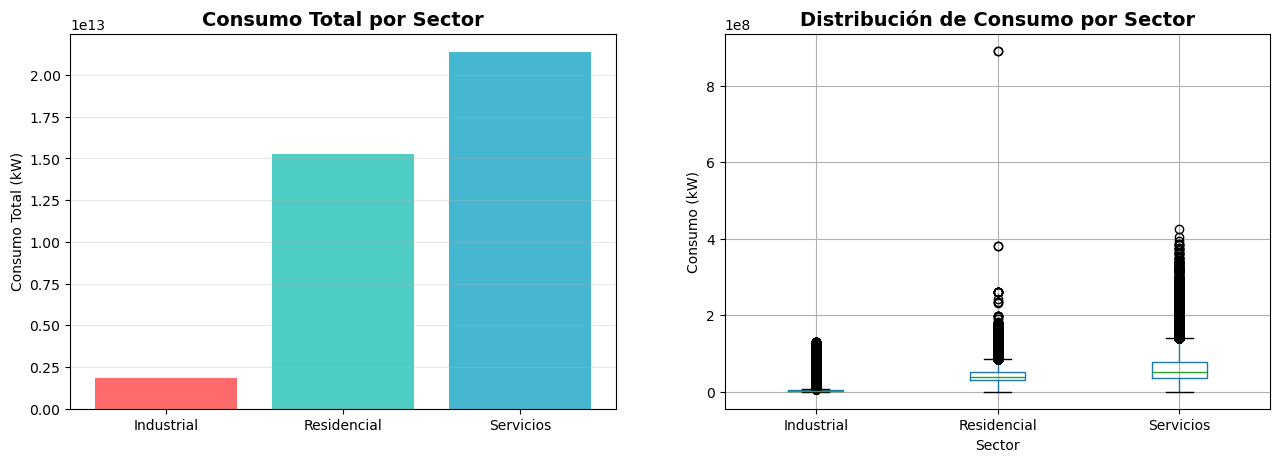

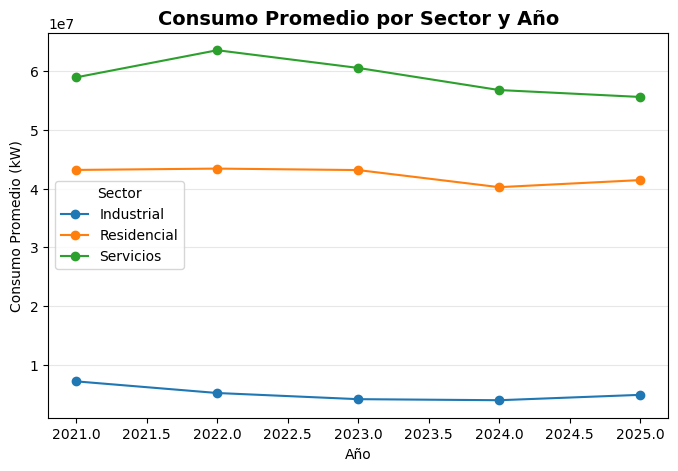

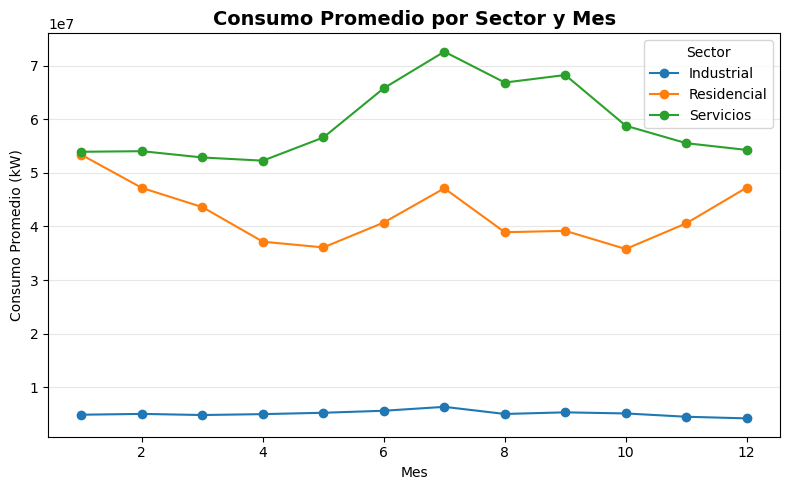

In [43]:
# ============================================================================
# ANÁLISIS POR SECTOR ECONÓMICO
# ============================================================================
import matplotlib.pyplot as plt

print("\n" + "=" * 80)
print("🏭 ANÁLISIS POR SECTOR ECONÓMICO")
print("=" * 80)

# Mapeo de sectores
sector_map = {1: 'Industrial', 2: 'Residencial', 3: 'Servicios'}
df['Sector'] = df['id_sector_economico'].map(sector_map)

# Estadísticas por sector
sector_stats = df.groupby('Sector')['consumo_kwh'].agg([
    ('count', 'count'),
    ('total', 'sum'),
    ('promedio', 'mean'),
    ('mediana', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

print("\n📊 Estadísticas por sector:")
display(sector_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Consumo total por sector
sector_total = df.groupby('Sector')['consumo_kwh'].sum()
axes[0].bar(sector_total.index, sector_total.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Consumo Total por Sector', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Consumo Total (kW)')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Distribución de consumo por sector (boxplot)
df.boxplot(column='consumo_kwh', by='Sector', ax=axes[1])
axes[1].set_title('Distribución de Consumo por Sector', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Consumo (kW)')
plt.suptitle('')

#Grafico 3: Consumo promedio por sector y año
fig, ax = plt.subplots(figsize=(8, 5))
sector_year = df.groupby(['anio', 'Sector'])['consumo_kwh'].mean().unstack()
sector_year.plot(kind='line', marker='o', ax=ax)
ax.set_title('Consumo Promedio por Sector y Año', fontsize=14, fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Consumo Promedio (kW)')
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Sector')

#Grafico 4: Consumo promedio por sector y mes
fig, ax = plt.subplots(figsize=(8, 5))
sector_month = df.groupby(['mes', 'Sector'])['consumo_kwh'].mean().unstack()
sector_month.plot(kind='line', marker='o', ax=ax)
ax.set_title('Consumo Promedio por Sector y Mes', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Consumo Promedio (kW)')
ax.grid(axis='y', alpha=0.3)
ax.legend(title='Sector')


plt.tight_layout()
plt.show()


⏰ ANÁLISIS POR TRAMO HORARIO

⏱️ Consumo por tramo horario:


,promedio,total,registros
id_tramo_horario,,,
1,24574393.34,6.633710e+12,269944
2,36910697.79,9.963821e+12,269944
3,42495008.92,1.147123e+13,269943
4,38622113.68,1.043824e+13,270266


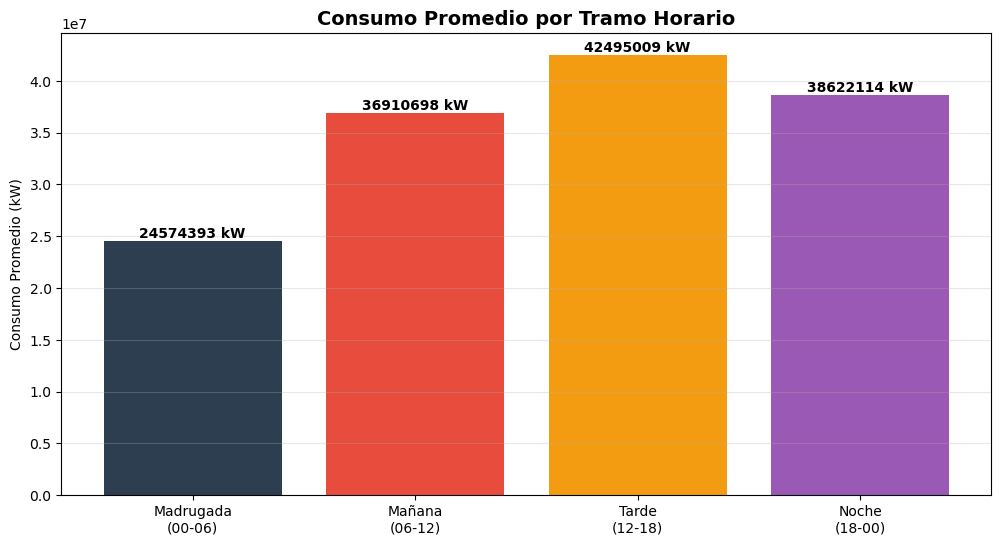

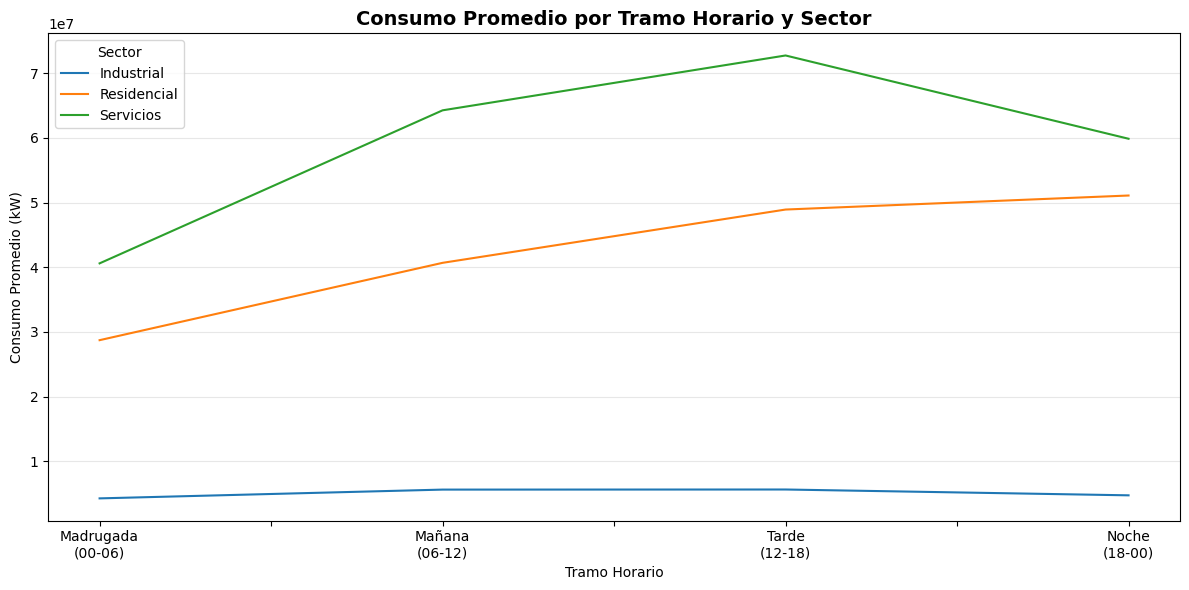

In [47]:
# ============================================================================
# ANÁLISIS POR TRAMO HORARIO
# ============================================================================
print("\n" + "=" * 80)
print("⏰ ANÁLISIS POR TRAMO HORARIO")
print("=" * 80)

# Mapeo de tramos horarios
tramo_map = {
    1: 'Madrugada (00-06)',
    2: 'Mañana (06-12)',
    3: 'Tarde (12-18)',
    4: 'Noche (18-00)'
}
df['Tramo_Horario'] = df['id_tramo_horario'].map(tramo_map)

# Estadísticas por tramo
tramo_stats = df.groupby('id_tramo_horario')['consumo_kwh'].agg([
    ('promedio', 'mean'),
    ('total', 'sum'),
    ('registros', 'count')
]).round(2)

print("\n⏱️ Consumo por tramo horario:")
display(tramo_stats)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
tramo_promedio = df.groupby('id_tramo_horario')['consumo_kwh'].mean()
tramo_labels = ['Madrugada\n(00-06)', 'Mañana\n(06-12)', 'Tarde\n(12-18)', 'Noche\n(18-00)']

bars = ax.bar(range(1, 5), tramo_promedio.values, color=['#2C3E50', '#E74C3C', '#F39C12', '#9B59B6'])
ax.set_xticks(range(1, 5))
ax.set_xticklabels(tramo_labels)
ax.set_title('Consumo Promedio por Tramo Horario', fontsize=14, fontweight='bold')
ax.set_ylabel('Consumo Promedio (kW)')
ax.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f} kW',
            ha='center', va='bottom', fontweight='bold')
    
# Consumo por tramo horario y sector
fig, ax = plt.subplots(figsize=(12, 6))
tramo_sector = df.groupby(['id_tramo_horario', 'Sector'])['consumo_kwh'].mean().unstack()

# Usar tramo_labels como etiquetas del eje x
tramo_sector.index = tramo_labels

tramo_sector.plot(kind='line', ax=ax)
ax.set_title('Consumo Promedio por Tramo Horario y Sector', fontsize=14, fontweight='bold')
ax.set_xlabel('Tramo Horario')
ax.set_ylabel('Consumo Promedio (kW)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


🌡️ IMPACTO DEL CLIMA

📊 Matriz de correlaciones:


,consumo_kwh,temperatura_media_ciudad,humedad_media_ciudad
consumo_kwh,1.000000,0.086292,-0.054701
temperatura_media_ciudad,0.086292,1.000000,-0.192303
humedad_media_ciudad,-0.054701,-0.192303,1.000000



💡 INTERPRETACIÓN:
  • Correlación Temperatura-Consumo: 0.086
    → ℹ️ Correlación débil

  • Correlación Humedad-Consumo: -0.055
    → ℹ️ Correlación débil


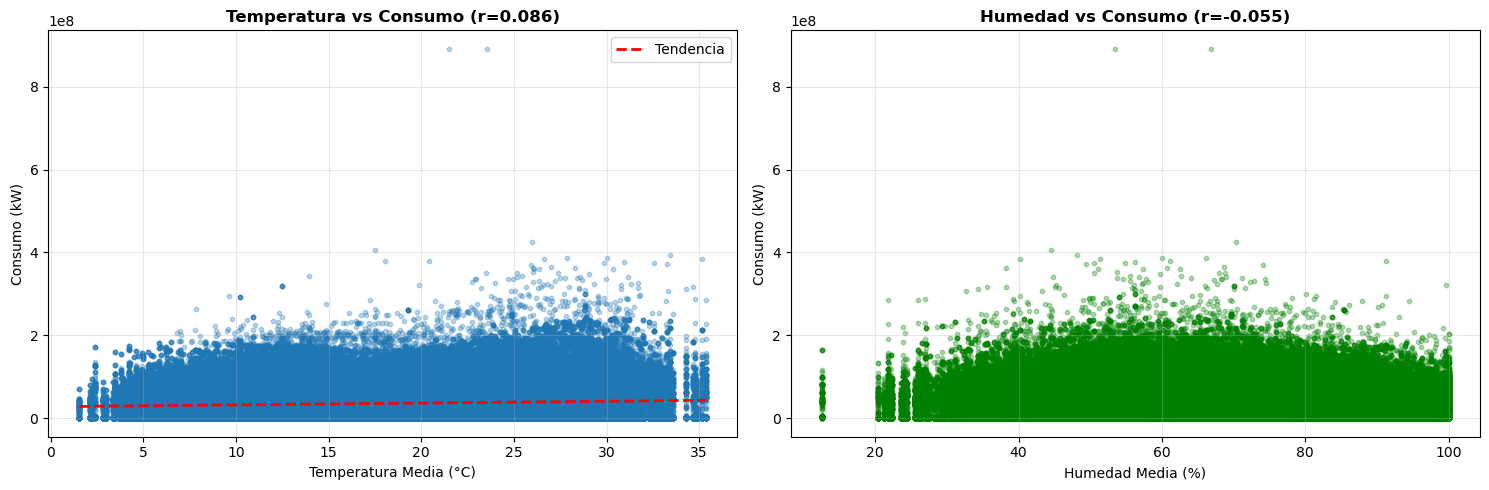

In [ ]:
import numpy as np

# ============================================================================
#  ANÁLISIS DE TEMPERATURA Y HUMEDAD
# ============================================================================
print("\n" + "=" * 80)
print("🌡️ IMPACTO DEL CLIMA")
print("=" * 80)

# Correlaciones
correlaciones = df[['consumo_kwh', 'temperatura_media_ciudad', 'humedad_media_ciudad']].corr()
print("\n📊 Matriz de correlaciones:")
display(correlaciones)

# Interpretación
corr_temp = correlaciones.loc['consumo_kwh', 'temperatura_media_ciudad']
corr_hum = correlaciones.loc['consumo_kwh', 'humedad_media_ciudad']

print(f"\n💡 INTERPRETACIÓN:")
print(f"  • Correlación Temperatura-Consumo: {corr_temp:.3f}")
if abs(corr_temp) > 0.7:
    print(f"    → ⚠️ CORRELACIÓN MUY FUERTE")
elif abs(corr_temp) > 0.4:
    print(f"    → 🔔 Correlación moderada")
else:
    print(f"    → ℹ️ Correlación débil")

print(f"\n  • Correlación Humedad-Consumo: {corr_hum:.3f}")
if abs(corr_hum) > 0.7:
    print(f"    → ⚠️ CORRELACIÓN MUY FUERTE")
elif abs(corr_hum) > 0.4:
    print(f"    → 🔔 Correlación moderada")
else:
    print(f"    → ℹ️ Correlación débil")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Temperatura vs Consumo
axes[0].scatter(df['temperatura_media_ciudad'], df['consumo_kwh'], alpha=0.3, s=10)
axes[0].set_xlabel('Temperatura Media (°C)')
axes[0].set_ylabel('Consumo (kW)')
axes[0].set_title(f'Temperatura vs Consumo (r={corr_temp:.3f})', fontweight='bold')
axes[0].grid(alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(df['temperatura_media_ciudad'].dropna(), 
               df.loc[df['temperatura_media_ciudad'].notna(), 'consumo_kwh'], 1)
p = np.poly1d(z)
axes[0].plot(df['temperatura_media_ciudad'].sort_values(), 
             p(df['temperatura_media_ciudad'].sort_values()), 
             "r--", linewidth=2, label='Tendencia')
axes[0].legend()

# Scatter plot: Humedad vs Consumo
axes[1].scatter(df['humedad_media_ciudad'], df['consumo_kwh'], alpha=0.3, s=10, color='green')
axes[1].set_xlabel('Humedad Media (%)')
axes[1].set_ylabel('Consumo (kW)')
axes[1].set_title(f'Humedad vs Consumo (r={corr_hum:.3f})', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


📅 IMPACTO DE DÍAS ESPECIALES

📊 Consumo según tipo de día:


promedio     mediana  registros
es_fin_de_semana es_festivo                                    
False            False       37526468.04  34451000.0     740407
                 True        30074544.59  29654000.0      30436
True             False       31745827.79  30789000.0     302258
                 True        30212539.88  30062000.0       6996


💡 COMPARACIONES:
  • Consumo día laboral: 37526468.04 kW
  • Consumo fin de semana: 31711141.47 kW (+18.3%)
  • Consumo festivo: 30100335.76 kW (+24.7%)


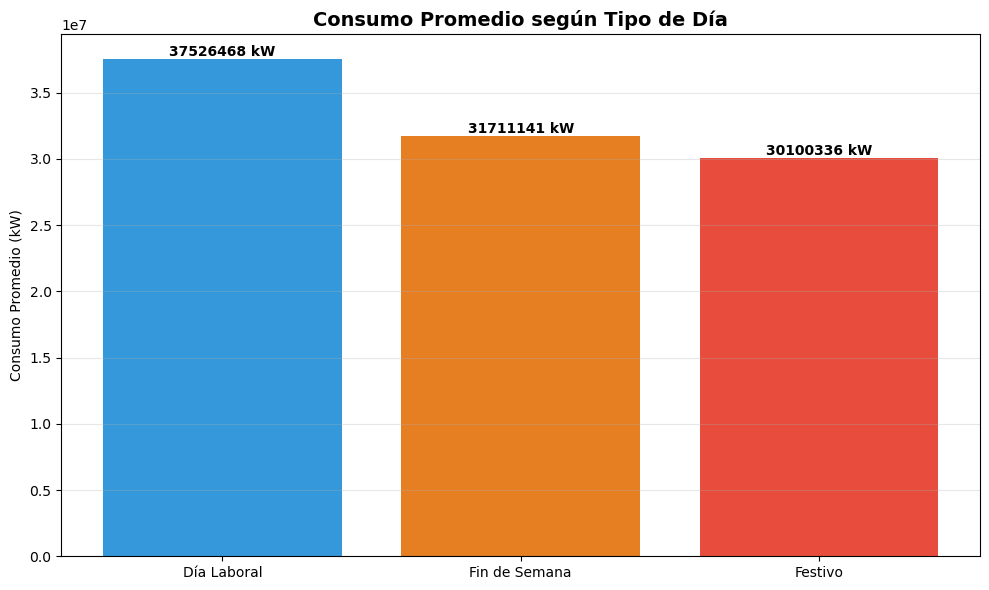

In [ ]:
# 5. ANÁLISIS DE DÍAS ESPECIALES
# ============================================================================
print("\n" + "=" * 80)
print("📅 IMPACTO DE DÍAS ESPECIALES")
print("=" * 80)

# Estadísticas por tipo de día
dias_stats = df.groupby(['es_fin_de_semana', 'es_festivo'])['consumo_kwh'].agg([
    ('promedio', 'mean'),
    ('mediana', 'median'),
    ('registros', 'count')
]).round(2)

print("\n📊 Consumo según tipo de día:")
display(dias_stats)

# Comparación
consumo_laboral = df[~df['es_fin_de_semana'] & ~df['es_festivo']]['consumo_kwh'].mean()
consumo_fds = df[df['es_fin_de_semana']]['consumo_kwh'].mean()
consumo_festivo = df[df['es_festivo']]['consumo_kwh'].mean()

diferencia_fds = ((consumo_laboral - consumo_fds) / consumo_fds * 100)
diferencia_fest = ((consumo_laboral - consumo_festivo) / consumo_festivo * 100)

print(f"\n💡 COMPARACIONES:")
print(f"  • Consumo día laboral: {consumo_laboral:.2f} kW")
print(f"  • Consumo fin de semana: {consumo_fds:.2f} kW ({diferencia_fds:+.1f}%)")
print(f"  • Consumo festivo: {consumo_festivo:.2f} kW ({diferencia_fest:+.1f}%)")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
categorias = ['Día Laboral', 'Fin de Semana', 'Festivo']
valores = [consumo_laboral, consumo_fds, consumo_festivo]
colores = ['#3498DB', '#E67E22', '#E74C3C']

bars = ax.bar(categorias, valores, color=colores)
ax.set_title('Consumo Promedio según Tipo de Día', fontsize=14, fontweight='bold')
ax.set_ylabel('Consumo Promedio (kW)')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f} kW',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



🗓️ PATRONES MENSUALES

📆 Promedios mensuales:


,consumo_kwh,temperatura_media_ciudad,humedad_media_ciudad
mes,,,
Enero,37387576.33,10.25,62.25
Febrero,35415170.08,11.67,69.20
Marzo,33759511.83,12.67,70.80
Abril,31519735.32,14.83,65.80
Mayo,32635609.14,18.53,65.65
Junio,37462643.04,23.77,64.68
Julio,42072176.85,25.75,64.41
Agosto,37268172.99,26.12,65.46
Septiembre,37579947.58,22.58,68.84


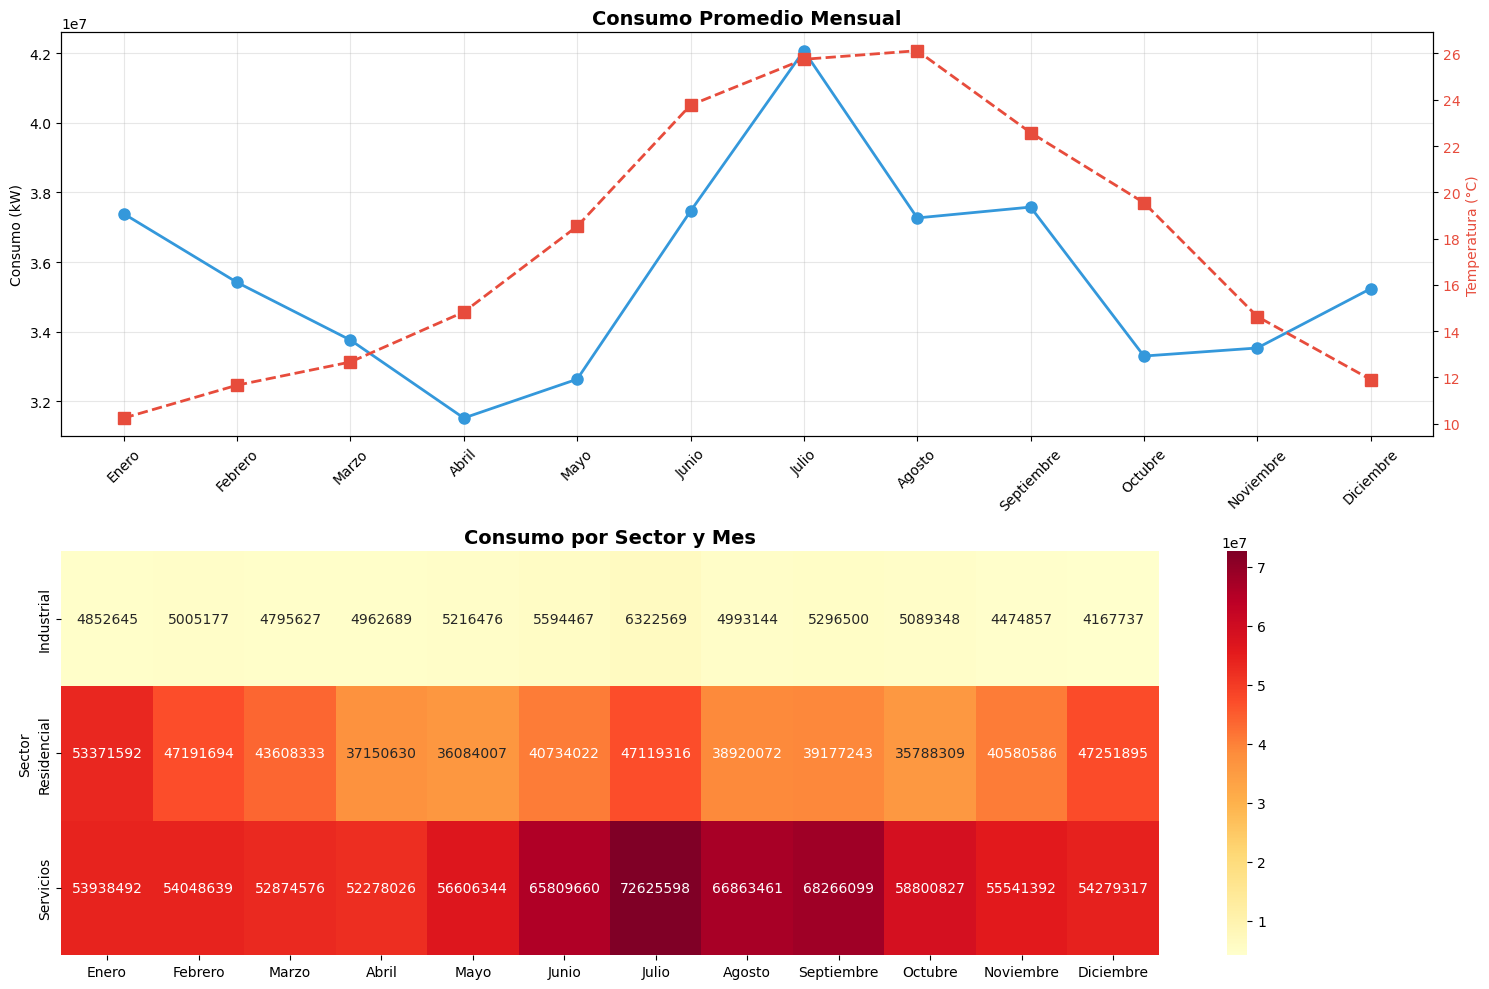

In [29]:
import seaborn as sns

# 6. PATRONES ESTACIONALES (MENSUAL)
# ============================================================================
print("\n" + "=" * 80)
print("🗓️ PATRONES MENSUALES")
print("=" * 80)

# Estadísticas mensuales
meses_nombres = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

mensual_stats = df.groupby('mes').agg({
    'consumo_kwh': 'mean',
    'temperatura_media_ciudad': 'mean',
    'humedad_media_ciudad': 'mean'
}).round(2)

mensual_stats.index = mensual_stats.index.map(meses_nombres)

print("\n📆 Promedios mensuales:")
display(mensual_stats)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico 1: Consumo mensual
axes[0].plot(range(1, 13), df.groupby('mes')['consumo_kwh'].mean().values, 
             marker='o', linewidth=2, markersize=8, color='#3498DB')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(list(meses_nombres.values()), rotation=45)
axes[0].set_title('Consumo Promedio Mensual', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Consumo (kW)')
axes[0].grid(alpha=0.3)

# Gráfico 2: Temperatura mensual
ax2 = axes[0].twinx()
ax2.plot(range(1, 13), df.groupby('mes')['temperatura_media_ciudad'].mean().values,
         marker='s', linewidth=2, markersize=8, color='#E74C3C', linestyle='--')
ax2.set_ylabel('Temperatura (°C)', color='#E74C3C')
ax2.tick_params(axis='y', labelcolor='#E74C3C')

# Gráfico 3: Heatmap sector x mes
pivot_mes_sector = df.pivot_table(
    values='consumo_kwh',
    index='Sector',
    columns='mes',
    aggfunc='mean'
)
pivot_mes_sector.columns = [meses_nombres[m] for m in pivot_mes_sector.columns]

sns.heatmap(pivot_mes_sector, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Consumo por Sector y Mes', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sector')

plt.tight_layout()
plt.show()


🔍 MATRIZ SECTOR-HORARIO

📊 Consumo promedio por Sector y Tramo Horario:


Tramo_Horario,Madrugada (00-06),Mañana (06-12),Noche (18-00),Tarde (12-18)
Sector,,,,
Industrial,4286576.95,5642956.67,4757454.28,5657853.93
Residencial,28731942.83,40682648.91,51084279.42,48917151.62
Servicios,40601594.79,64247203.91,59855190.22,72722286.20


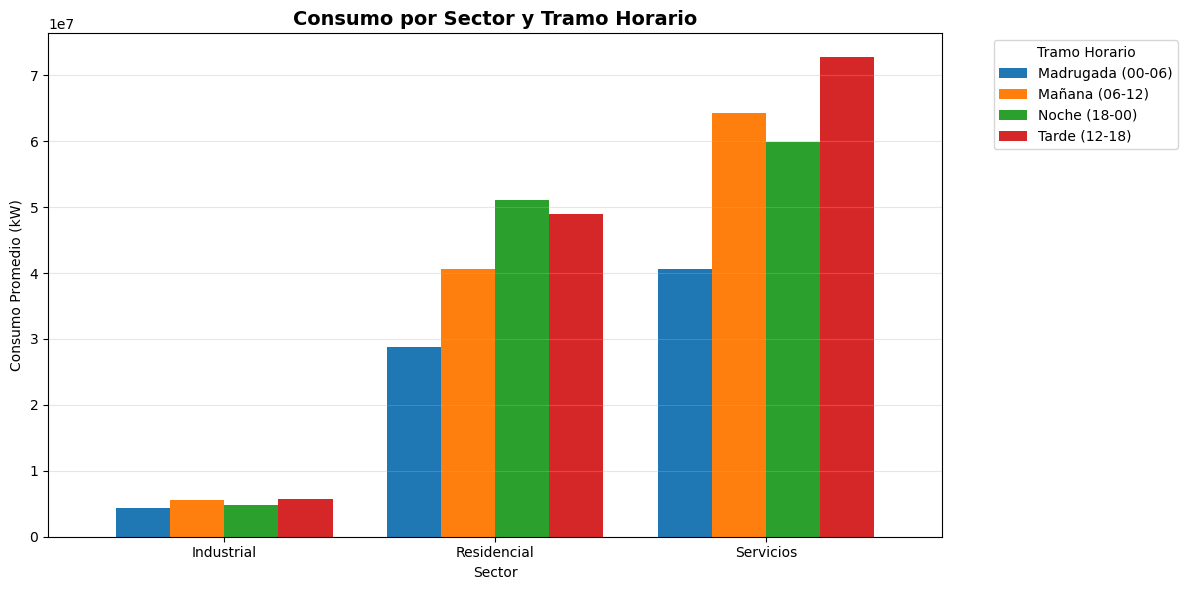

In [31]:
# ============================================================================
# 7. ANÁLISIS COMBINADO: SECTOR x HORARIO
# ============================================================================
print("\n" + "=" * 80)
print("🔍 MATRIZ SECTOR-HORARIO")
print("=" * 80)

# Pivot table
pivot_sector_horario = df.pivot_table(
    values='consumo_kwh',
    index='Sector',
    columns='Tramo_Horario',
    aggfunc='mean'
).round(2)

print("\n📊 Consumo promedio por Sector y Tramo Horario:")
display(pivot_sector_horario)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
pivot_sector_horario.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Consumo por Sector y Tramo Horario', fontsize=14, fontweight='bold')
ax.set_ylabel('Consumo Promedio (kW)')
ax.set_xlabel('Sector')
ax.legend(title='Tramo Horario', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


📍 TOP 10 CÓDIGOS POSTALES

🏘️ Códigos postales con mayor consumo:


,consumo_total,consumo_promedio,registros,poblacion
id_geografia,,,,
08014,7.370561e+12,45140622.15,163280,30680.52
08017,6.248817e+12,34098468.96,183258,24933.64
08028,4.747824e+12,58155611.81,81640,<NA>
08023,4.251682e+12,23223338.56,183078,16446.99
08004,3.427124e+12,42003185.46,81592,22451.76
08025,3.091637e+12,37869145.91,81640,<NA>
08029,9.412916e+11,46128176.42,20406,<NA>
08003,9.109233e+11,44657482.69,20398,<NA>
08013,8.777593e+11,42997906.44,20414,<NA>


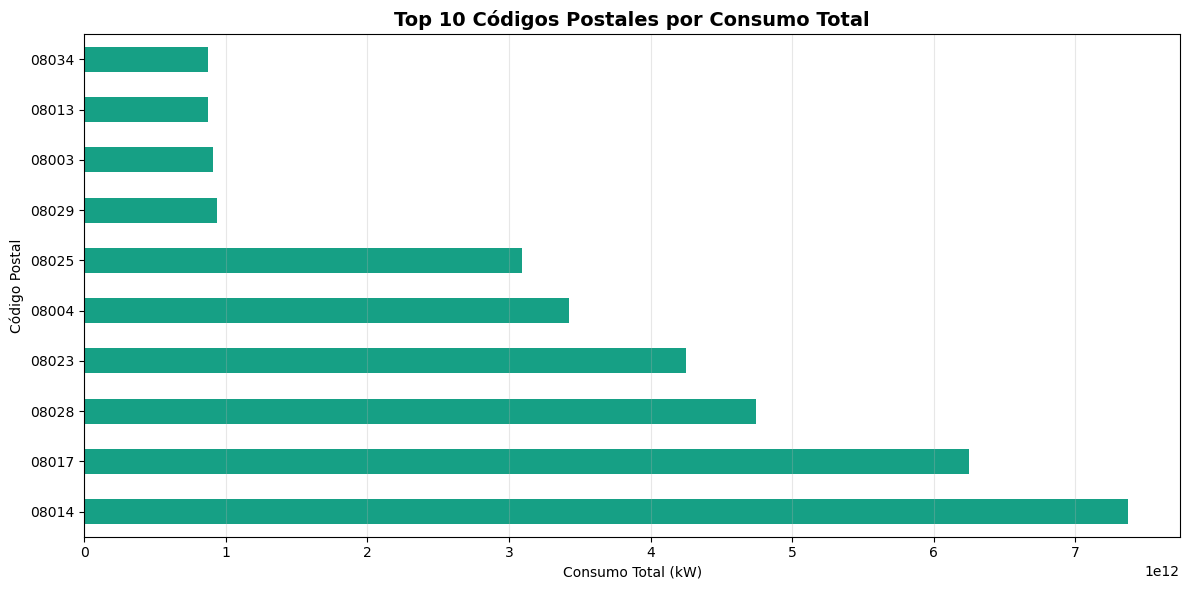

In [32]:
# ============================================================================
# 8. TOP CÓDIGOS POSTALES
# ============================================================================
print("\n" + "=" * 80)
print("📍 TOP 10 CÓDIGOS POSTALES")
print("=" * 80)

top_cp = df.groupby('id_geografia').agg({
    'consumo_kwh': ['sum', 'mean', 'count'],
    'poblacion': 'mean'
}).round(2)

top_cp.columns = ['consumo_total', 'consumo_promedio', 'registros', 'poblacion']
top_cp = top_cp.sort_values('consumo_total', ascending=False).head(10)

print("\n🏘️ Códigos postales con mayor consumo:")
display(top_cp)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
top_cp['consumo_total'].plot(kind='barh', ax=ax, color='#16A085')
ax.set_title('Top 10 Códigos Postales por Consumo Total', fontsize=14, fontweight='bold')
ax.set_xlabel('Consumo Total (kW)')
ax.set_ylabel('Código Postal')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# ============================================================================
# 9. RESUMEN DE INSIGHTS
# ============================================================================
print("\n" + "=" * 80)
print("💡 RESUMEN DE INSIGHTS PRINCIPALES")
print("=" * 80)

print("\n1️⃣ POR SECTOR:")
sector_max = df.groupby('Sector')['consumo_kwh'].sum().idxmax()
print(f"   ✅ Mayor consumo: {sector_max}")

print("\n2️⃣ POR HORARIO:")
horario_max = df.groupby('Tramo_Horario')['consumo_kwh'].mean().idxmax()
print(f"   ✅ Horario pico: {horario_max}")

print("\n3️⃣ POR ESTACIONALIDAD:")
mes_max = df.groupby('mes')['consumo_kwh'].mean().idxmax()
mes_min = df.groupby('mes')['consumo_kwh'].mean().idxmin()
print(f"   ✅ Mayor consumo: {meses_nombres[mes_max]}")
print(f"   ✅ Menor consumo: {meses_nombres[mes_min]}")

print("\n4️⃣ IMPACTO CLIMÁTICO:")
if abs(corr_temp) > 0.5:
    print(f"   ⚠️ FUERTE correlación con temperatura ({corr_temp:.2f})")
else:
    print(f"   ℹ️ Correlación moderada/débil con temperatura ({corr_temp:.2f})")

print("\n5️⃣ DÍAS ESPECIALES:")
print(f"   ✅ Diferencia laboral vs fin de semana: {diferencia_fds:+.1f}%")
print(f"   ✅ Diferencia laboral vs festivo: {diferencia_fest:+.1f}%")

print("\n" + "=" * 80)
print("✨ Análisis completado")
print("=" * 80)


💡 RESUMEN DE INSIGHTS PRINCIPALES

1️⃣ POR SECTOR:
   ✅ Mayor consumo: Servicios

2️⃣ POR HORARIO:
   ✅ Horario pico: Tarde (12-18)

3️⃣ POR ESTACIONALIDAD:
   ✅ Mayor consumo: Julio
   ✅ Menor consumo: Abril

4️⃣ IMPACTO CLIMÁTICO:
   ℹ️ Correlación moderada/débil con temperatura (0.09)

5️⃣ DÍAS ESPECIALES:
   ✅ Diferencia laboral vs fin de semana: +18.3%
   ✅ Diferencia laboral vs festivo: +24.7%

✨ Análisis completado
